In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df=pd.read_csv("listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rank
2978,20791161,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,122991242,Jj,West Region,Tuas,1.31909,103.64656,Entire home/apt,10000,2,5,2017-10-31,0.21,1,89,0
2392,17831833,Comfortable & Quiet Master Bedroom,68223771,Yolivia,West Region,Bukit Panjang,1.34775,103.77181,Private room,10000,1,1,2017-05-27,0.04,1,0,0
5823,32026675,Testing,20307016,David,Central Region,Kallang,1.29610,103.86613,Private room,10000,1,0,NaN,NaN,1,0,0
2100,16395877,The Club Residences - Contemporary Manor,84411185,Darren,Central Region,Southern Islands,1.25284,103.82225,Entire home/apt,8900,2,0,NaN,NaN,6,361,0
3485,22617828,The Club Residences - Contemporary Manor (A),84411185,Darren,Central Region,Southern Islands,1.25054,103.82551,Entire home/apt,8900,2,0,NaN,NaN,6,0,0


In [5]:
df.drop(["rank"],axis=1,inplace=True)

In [6]:
df.reset_index(inplace=True,drop=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20791161,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,122991242,Jj,West Region,Tuas,1.31909,103.64656,Entire home/apt,10000,2,5,2017-10-31,0.21,1,89
1,17831833,Comfortable & Quiet Master Bedroom,68223771,Yolivia,West Region,Bukit Panjang,1.34775,103.77181,Private room,10000,1,1,2017-05-27,0.04,1,0
2,32026675,Testing,20307016,David,Central Region,Kallang,1.29610,103.86613,Private room,10000,1,0,NaN,NaN,1,0
3,16395877,The Club Residences - Contemporary Manor,84411185,Darren,Central Region,Southern Islands,1.25284,103.82225,Entire home/apt,8900,2,0,NaN,NaN,6,361
4,22617828,The Club Residences - Contemporary Manor (A),84411185,Darren,Central Region,Southern Islands,1.25054,103.82551,Entire home/apt,8900,2,0,NaN,NaN,6,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

In [8]:
df.shape

(7907, 16)

In [9]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7902,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,1.33698,103.93293,Shared room,14,1,0,NaN,NaN,2,0
7903,18679631,Small room for you,108408404,Sutthida,Central Region,Marine Parade,1.30823,103.89461,Private room,14,2,1,2017-05-14,0.04,1,0
7904,35947264,Senja cozy,75175440,Rain,West Region,Bukit Panjang,1.38400,103.76309,Entire home/apt,14,1,1,2019-06-24,0.45,2,0
7905,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,1.31455,103.88323,Entire home/apt,14,3,4,2019-08-26,4.00,1,34
7906,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,1.30954,103.85271,Entire home/apt,0,3,9,2019-08-11,0.51,6,351


In [10]:
df.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

name                                 2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
def impute_median(series):
    return series.fillna(series.median())

In [13]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)

In [14]:
df.isnull().sum()

name                              2
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

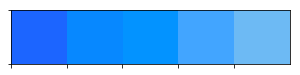

In [15]:

colorsog = ['#1c65ff','#0788ff','#0393ff','#42a5ff','#6dbaf4']
sns.set_palette(sns.color_palette(colorsog))
lol = sns.palplot(sns.color_palette(colorsog))

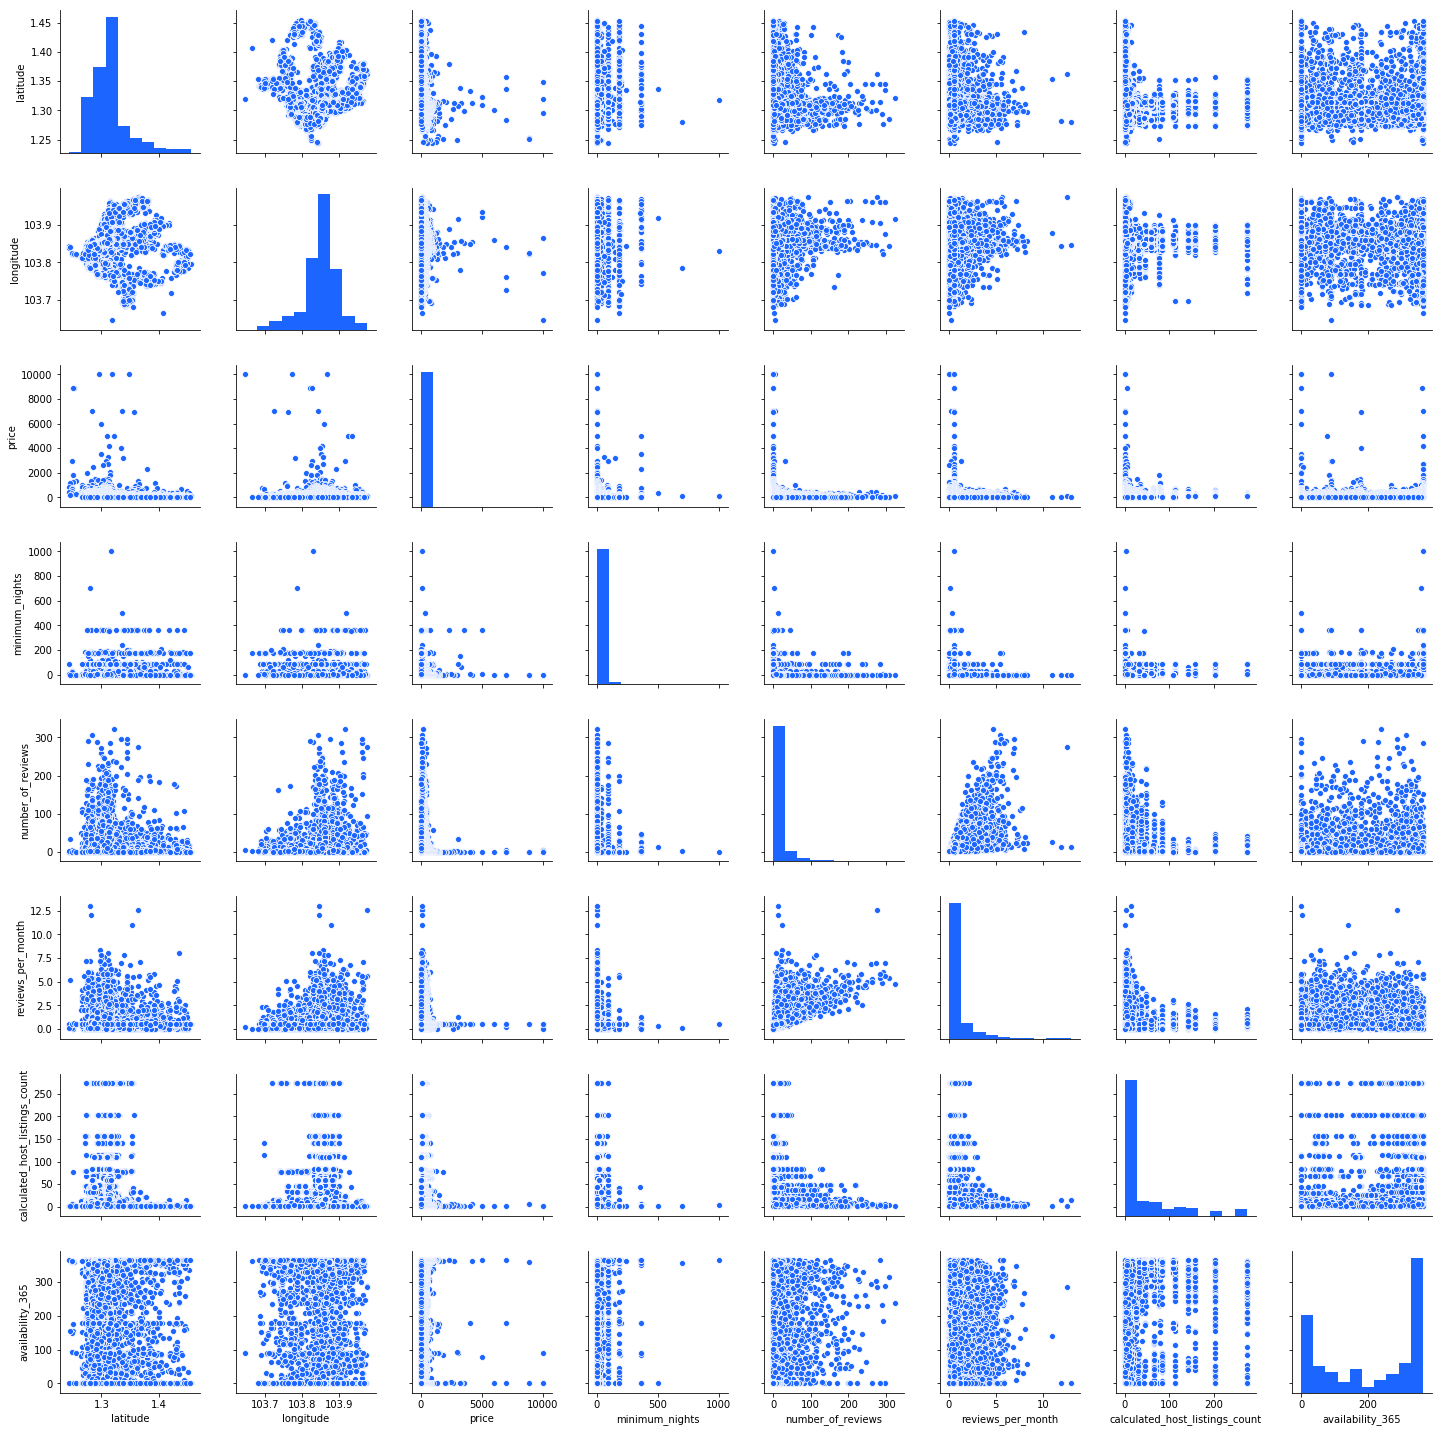

In [16]:
sns.pairplot(df)
plt.show()

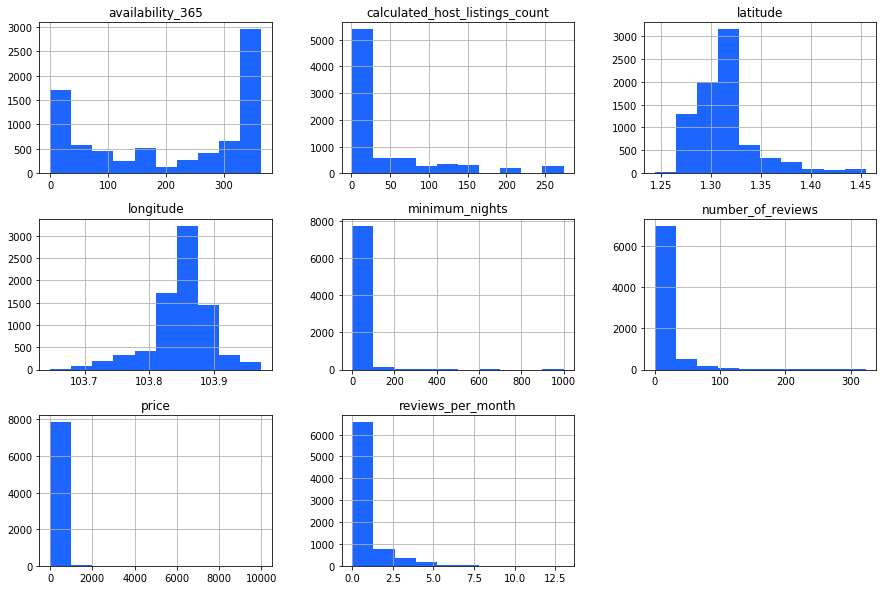

In [17]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [18]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [19]:
df.nunique()

name                              7457
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
reviews_per_month                  527
calculated_host_listings_count      55
availability_365                   359
dtype: int64

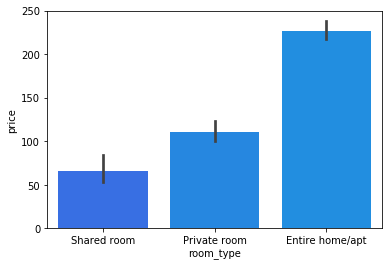

In [20]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

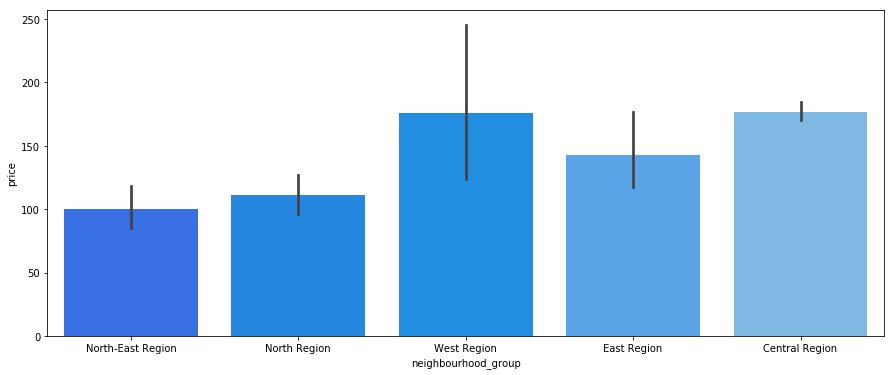

In [21]:
#neighbourhood_group - price
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

[6309  540  508  346  204]


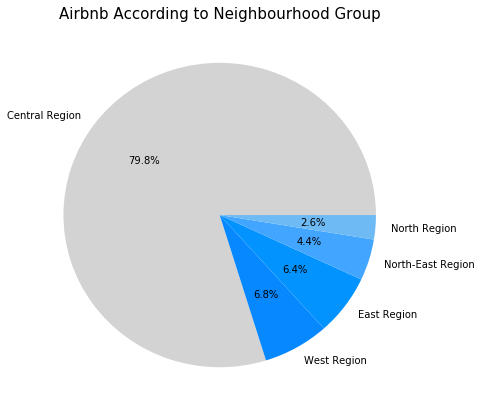

In [22]:
labels = df.neighbourhood_group.value_counts().index
colors = ['lightgrey','#0788ff','#0393ff','#42a5ff','#6dbaf4']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values
np.savetxt("sizes.csv", sizes, delimiter=",")
print(sizes)
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'black',fontsize = 15)
plt.show()

In [23]:
newdf = df[['neighbourhood_group', 'price','room_type']].copy()
export_csv = newdf.to_csv (r'newdf.csv', index = None, header=True)

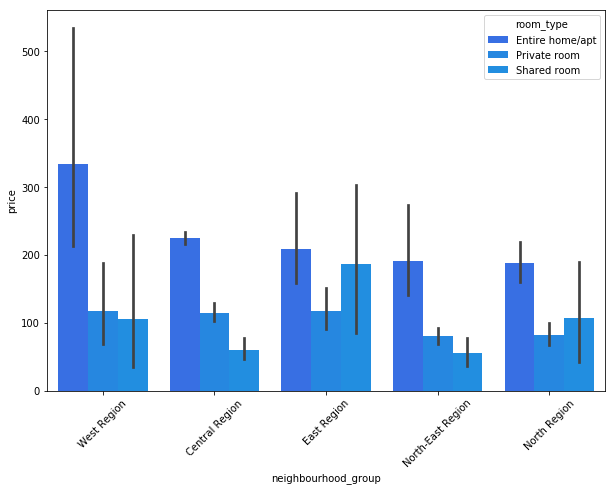

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

<Figure size 1296x1296 with 0 Axes>

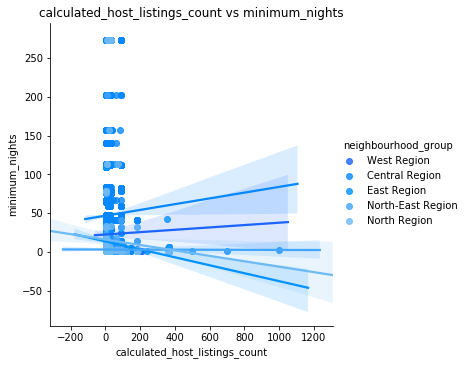

In [25]:
plt.figure(figsize=(18,18))
sns.lmplot(x='minimum_nights',y='calculated_host_listings_count',hue="neighbourhood_group",data=df)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('minimum_nights')
plt.title('calculated_host_listings_count vs minimum_nights')
plt.show()

In [26]:
df.price.max()

10000

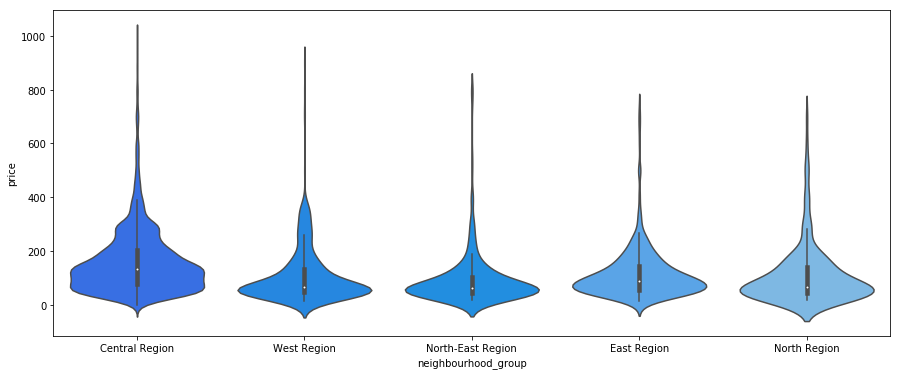

In [27]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width")

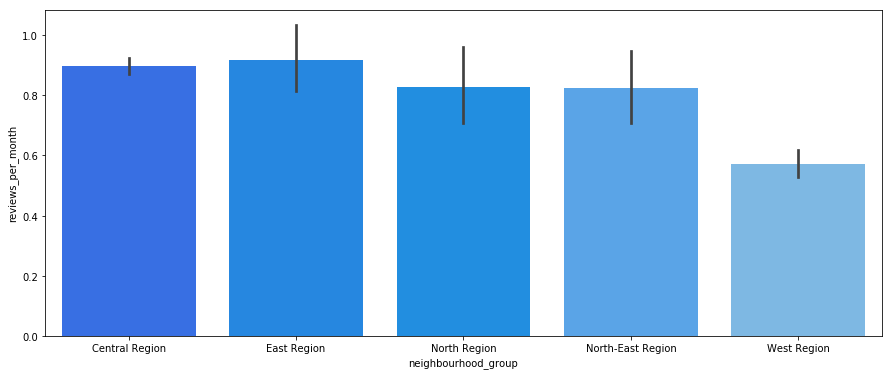

In [28]:
#neighbourhood_group - reviews_per_month
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) 
plt.show()

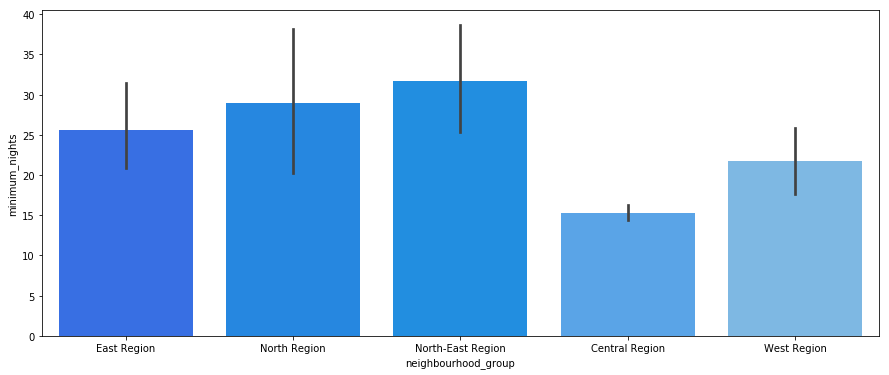

In [29]:
#neighbourhood_group - minimum_nights
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group'])
plt.show()

In [30]:
result1 = df[['neighbourhood_group', 'minimum_nights']].copy()
export_csv = result1.to_csv (r'ngnight1.csv', index = None, header=True)
export_csv = result.to_csv (r'ngnight.csv', index = None, header=True)

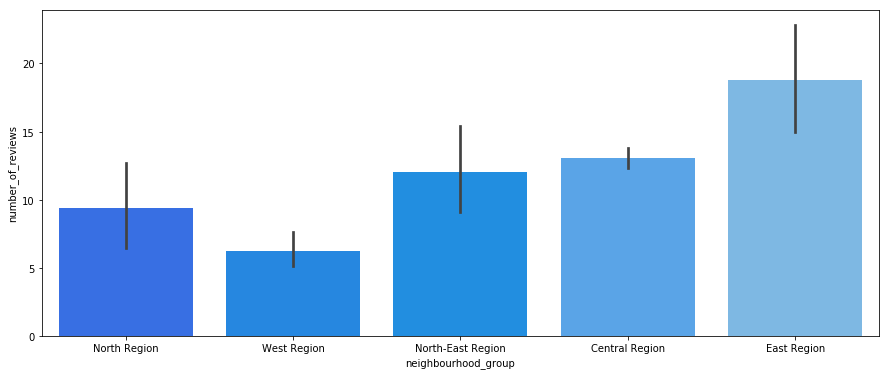

In [31]:
#neighbourhood_group - number_of_reviews
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

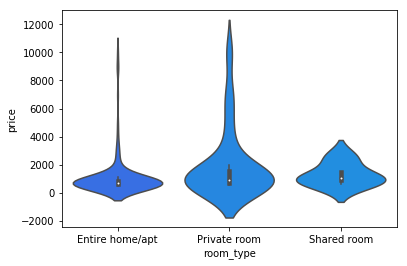

In [32]:

ax = sns.violinplot(x="room_type", y="price",
                    data=df[df.price > 500],
                    scale="width")

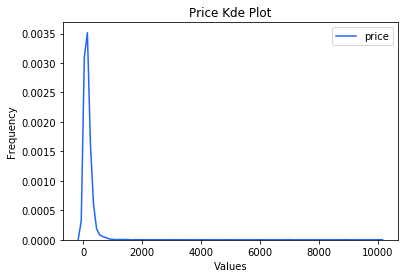

In [33]:
sns.kdeplot(df['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Kde Plot')
plt.show()

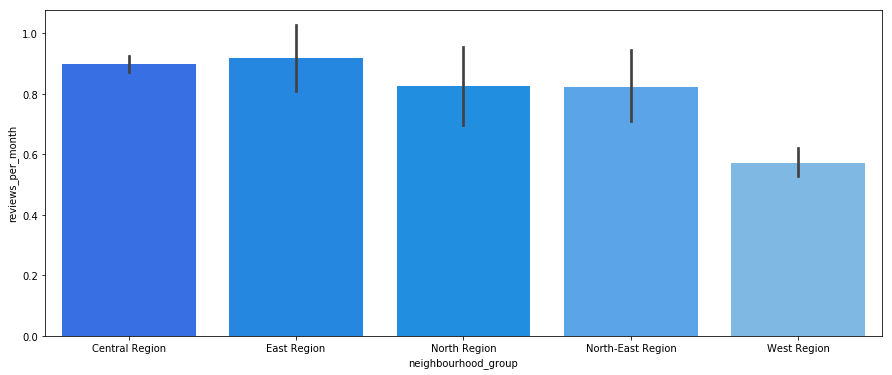

In [34]:
#neighbourhood_group - reviews_per_month
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

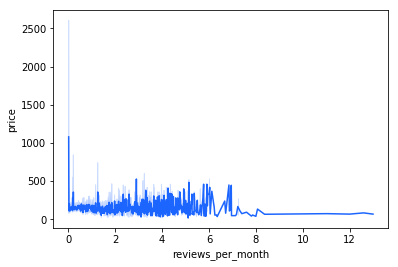

In [35]:
sns.lineplot(x='reviews_per_month',y='price',data=df)
plt.show()

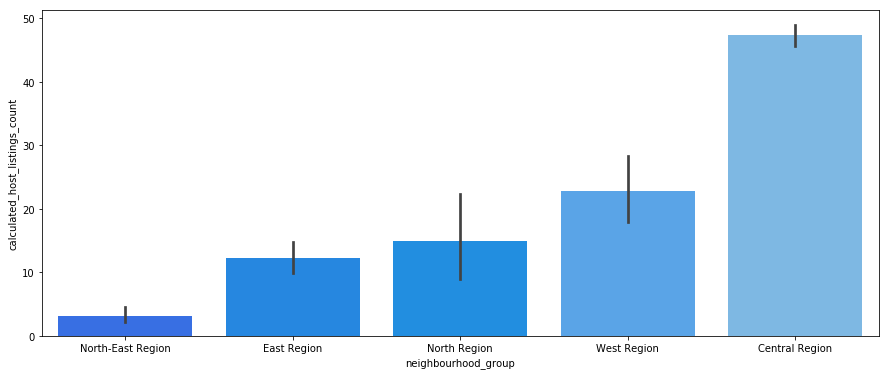

In [36]:
#neighbourhood_group - calculated_host_listings_count
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])
plt.show()

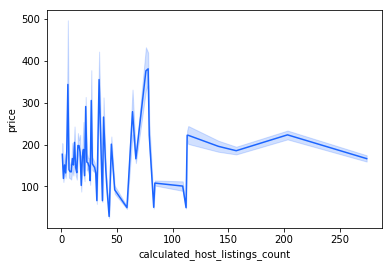

In [37]:
sns.lineplot(x='calculated_host_listings_count',y='price',data=df)
plt.show()

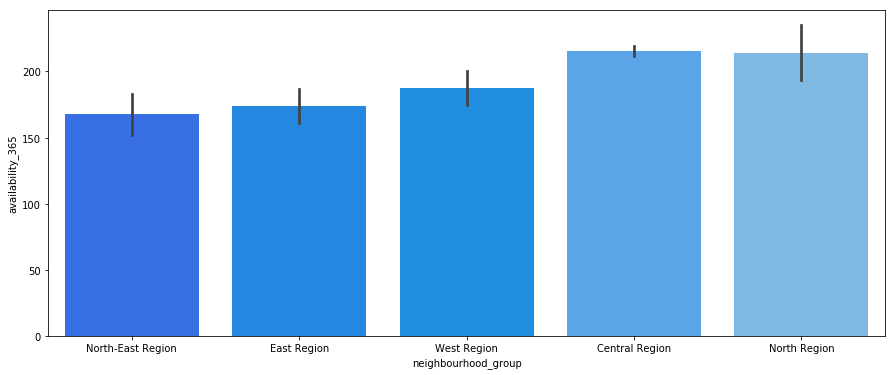

In [38]:
#neighbourhood_group - availability_365
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group'])
plt.show()

In [39]:
result2 = df[['neighbourhood_group', 'availability_365']].copy()
export_csv = result2.to_csv (r'ngavail.csv', index = None, header=True)

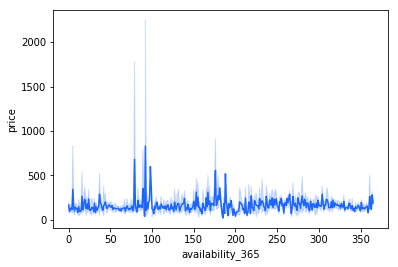

In [40]:
sns.lineplot(x='availability_365',y='price',data=df)
plt.show()

In [41]:
df.price.describe().T

count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

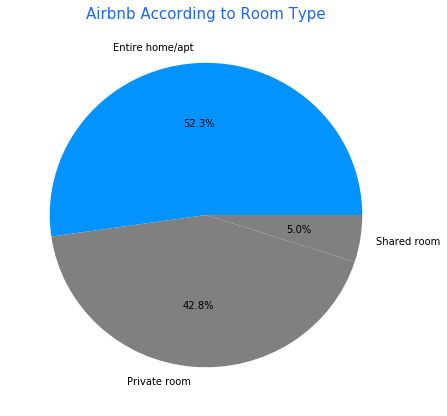

In [42]:
labels = df.room_type.value_counts().index
colors2 = ['#0393ff','grey','grey']
explode = [0,0,0]
sizes = df.room_type.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors2, autopct='%1.1f%%')
plt.title('Airbnb According to Room Type',color = '#1c65ff',fontsize = 15)
plt.show()

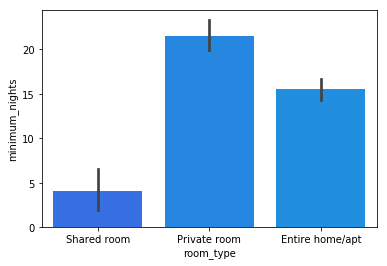

In [43]:
#room_type - minimum_nights
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) 

In [44]:
result3 = df[['room_type', 'minimum_nights']].copy()
export_csv = result3.to_csv (r'roomnights.csv', index = None, header=True)

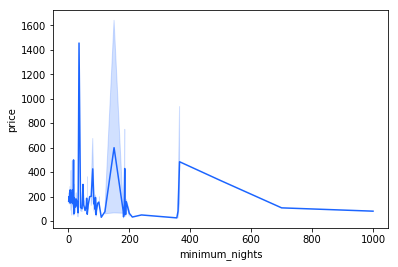

In [45]:
sns.lineplot(x='minimum_nights',y='price',data=df)
plt.show()

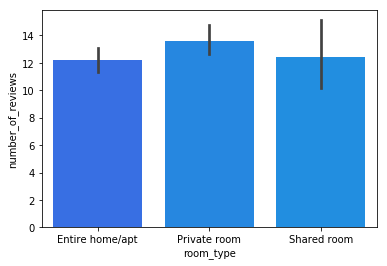

In [46]:
#room_type - number_of_reviews
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

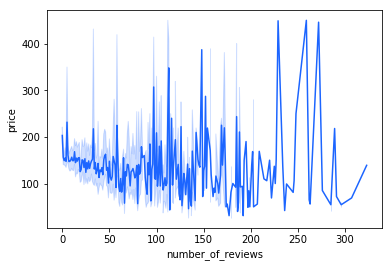

In [47]:
sns.lineplot(x='number_of_reviews',y='price',data=df)
plt.show()

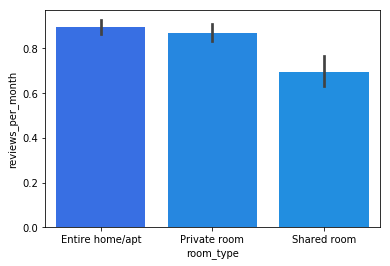

In [48]:
#room_type - reviews_per_month
result = df.groupby(["room_type"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='room_type', y="reviews_per_month", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

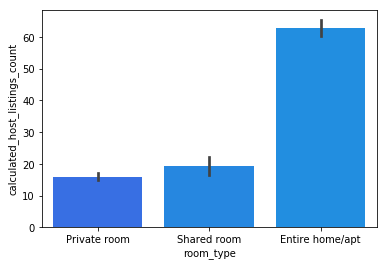

In [49]:
#room_type - calculated_host_listings_count
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

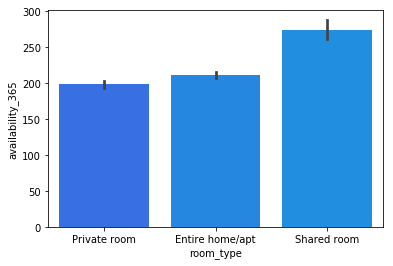

In [50]:
#room_type - availability_365
result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type'])
plt.show()

In [51]:
result6 = df[['room_type', 'availability_365']].copy()
export_csv = result6.to_csv (r'rtavil.csv', index = None, header=True)

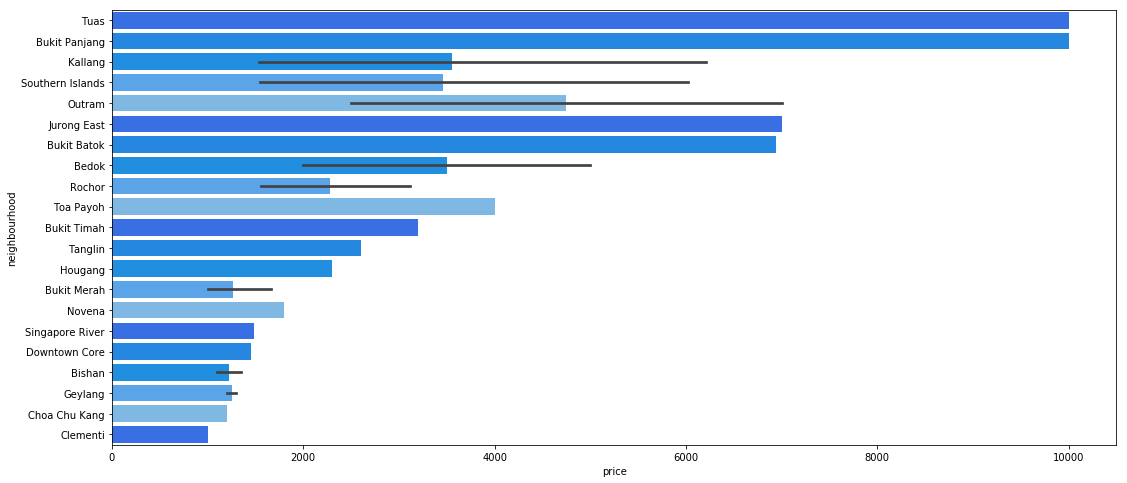

In [52]:
#neighbourhood - price
plt.figure(figsize=(18,8))
sns.set_palette(sns.color_palette(colorsog))
sns.barplot(x=df.price[:50], y=df.neighbourhood[:50], palette = sns.color_palette(colorsog))
plt.show()

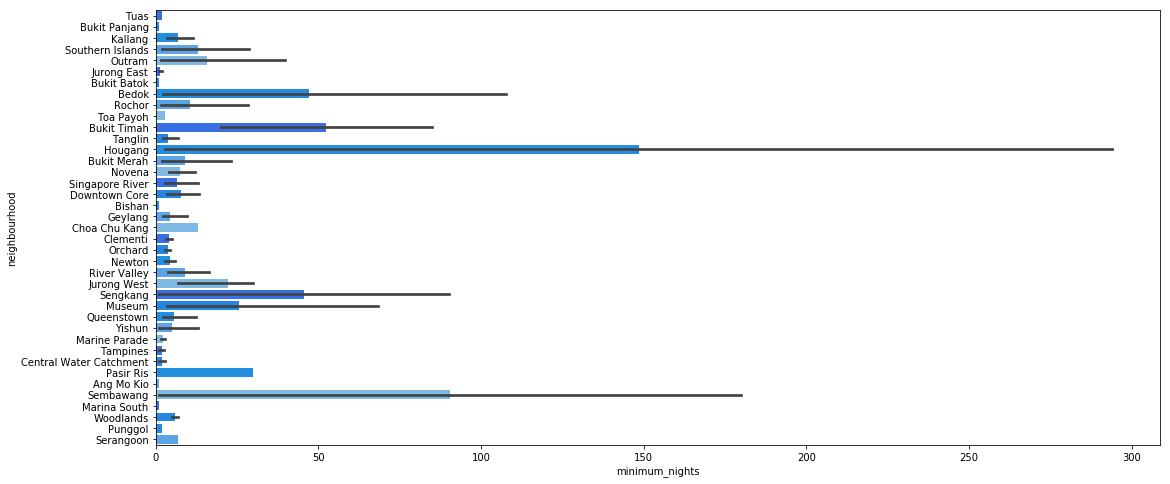

In [53]:
#neighbourhood - minimum_nights
plt.figure(figsize=(18,8))
sns.barplot(x=df.minimum_nights[:500], y=df.neighbourhood[:500], palette = sns.color_palette(colorsog))
plt.show()

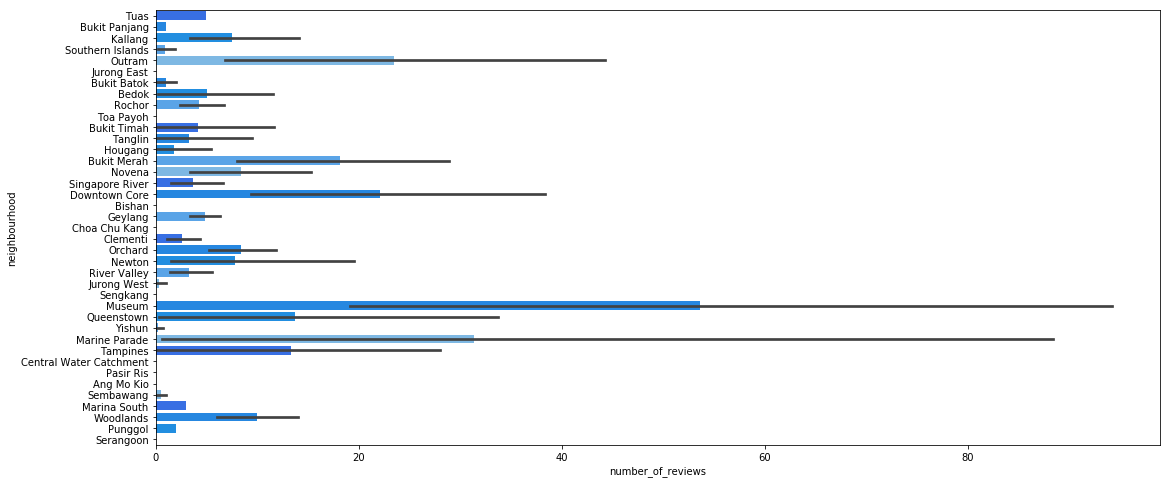

In [54]:
#neighbourhood - number_of_reviews
plt.figure(figsize=(18,8))
sns.barplot(x=df.number_of_reviews[:500], y=df.neighbourhood[:500], palette = sns.color_palette(colorsog)) 
plt.show()

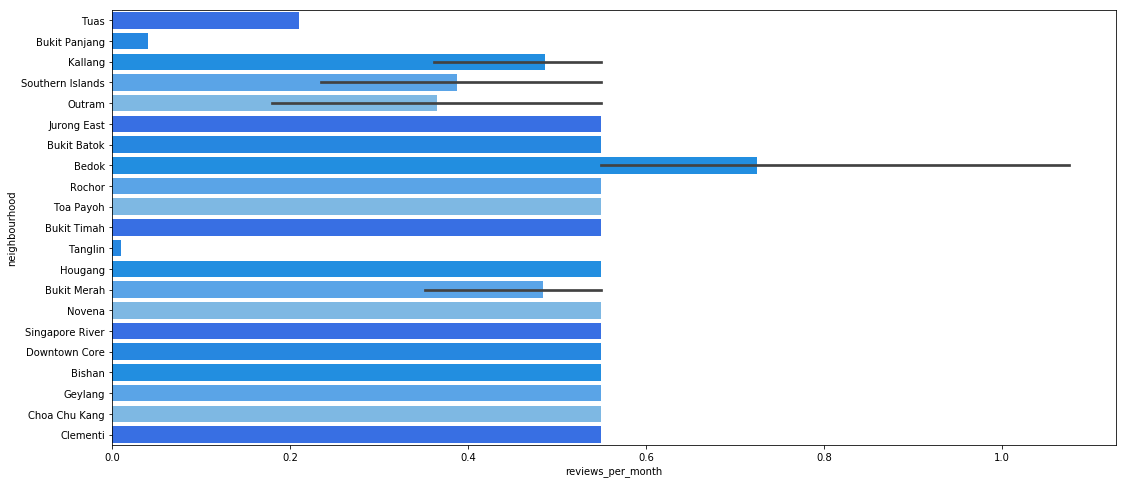

In [55]:
#neighbourhood - reviews_per_month
plt.figure(figsize=(18,8))
sns.barplot(x=df.reviews_per_month[:50], y=df.neighbourhood[:50], palette = sns.color_palette(colorsog))
plt.show()

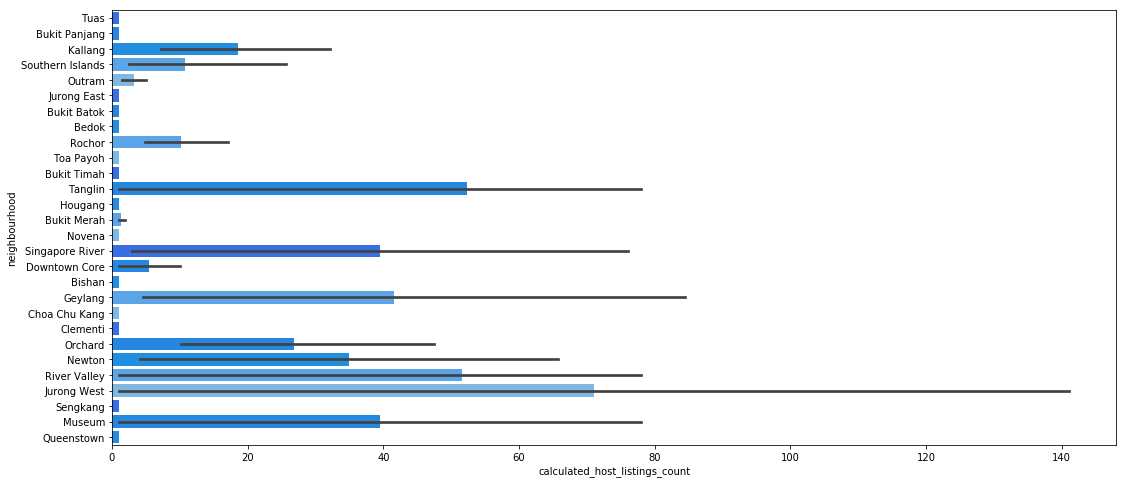

In [56]:
#neighbourhood - calculated_host_listings_count
plt.figure(figsize=(18,8))
sns.barplot(x=df.calculated_host_listings_count[:100], y=df.neighbourhood[:100], palette = sns.color_palette(colorsog))
plt.show()

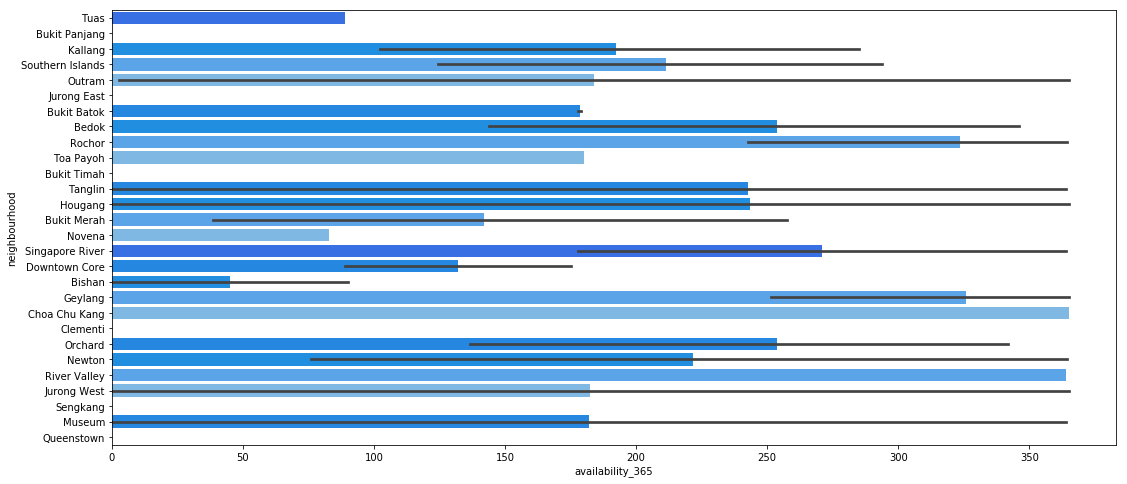

In [57]:
#neighbourhood - availability_365
plt.figure(figsize=(18,8))
sns.barplot(x=df.availability_365[:100], y=df.neighbourhood[:100], palette = sns.color_palette(colorsog))
plt.show()

In [58]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['latitude']=df.iloc[:,3]
df_rich_hosts['longitude']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

,name,neighbourhood_group,latitude,longitude,room_type,price
0,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,West Region,1.31909,103.64656,Entire home/apt,10000
1,Comfortable & Quiet Master Bedroom,West Region,1.34775,103.77181,Private room,10000
2,Testing,Central Region,1.29610,103.86613,Private room,10000
3,The Club Residences - Contemporary Manor,Central Region,1.25284,103.82225,Entire home/apt,8900
4,The Club Residences - Contemporary Manor (A),Central Region,1.25054,103.82551,Entire home/apt,8900


In [59]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [60]:
df_rich_hosts.dtypes

name                    object
neighbourhood_group     object
latitude               float64
longitude              float64
room_type               object
price                    int64
dtype: object

In [61]:
df[df.room_type=="Private room"].describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,3381.0,1.322407,0.036350,1.25306,1.29899,1.31294,1.33917,1.45459
longitude,3381.0,103.845948,0.053485,103.68162,103.83134,103.84945,103.88028,103.97342
price,3381.0,110.938480,353.884214,14.00000,50.00000,69.00000,100.00000,10000.00000
minimum_nights,3381.0,21.539781,47.926497,1.00000,1.00000,2.00000,18.00000,1000.00000
number_of_reviews,3381.0,13.609879,32.012694,0.00000,0.00000,2.00000,10.00000,307.00000
reviews_per_month,3381.0,0.865126,1.139184,0.01000,0.26000,0.55000,0.83000,13.00000
calculated_host_listings_count,3381.0,15.984028,29.007412,1.00000,1.00000,3.00000,13.00000,203.00000
availability_365,3381.0,198.209406,151.619447,0.00000,14.00000,215.00000,356.00000,365.00000


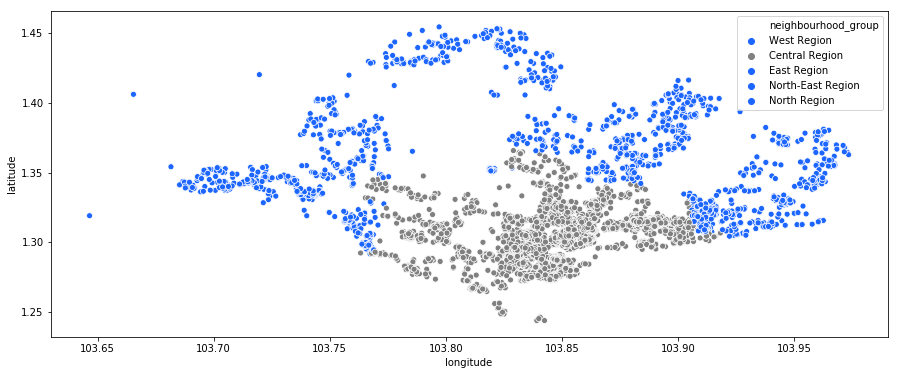

In [62]:
colursmap = ['#1c65ff','grey','#1c65ff','#1c65ff','#1c65ff']
sns.set_palette(sns.color_palette(colursmap))
plt.figure(figsize=(15,6))
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.neighbourhood_group)
plt.ioff()

In [63]:
result4 = df_rich_hosts[['longitude', 'latitude', 'neighbourhood_group']].copy()
export_csv = result4.to_csv (r'mapng.csv', index = None, header=True)

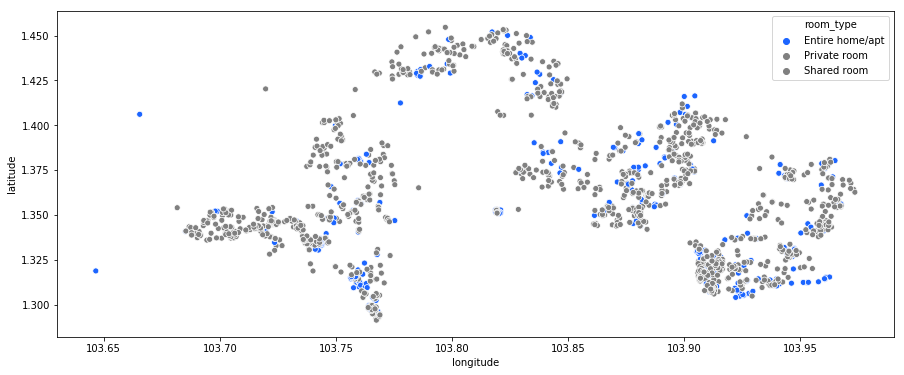

In [64]:
newdf_rich_hosts = df_rich_hosts[df_rich_hosts["neighbourhood_group"] != "Central Region"]
colursmap = ['#1c65ff','grey','grey','#1c65ff','#1c65ff']
sns.set_palette(sns.color_palette(colursmap))
plt.figure(figsize=(15,6))
sns.scatterplot(newdf_rich_hosts.longitude,newdf_rich_hosts.latitude,hue=newdf_rich_hosts.room_type,)
plt.ioff()

In [65]:
result5 = df_rich_hosts[['longitude', 'latitude', 'room_type']].copy()
export_csv = result5.to_csv (r'maprt.csv', index = None, header=True)

In [66]:
print(df.latitude.max())
print(df.latitude.min())
print(df.longitude.max())
print(df.longitude.min())

1.45459
1.24387
103.97341999999999
103.64656
